In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
try:
    from pandas_datareader import data
except ImportError:
    !pip install pandas-datareader
    from pandas_datareader import data

In [10]:
import pandas as pd

In [11]:
returns = data.get_data_yahoo('SPY', start='2008-5-1', end='2009-12-1')['Adj Close'].pct_change()
print(len(returns))

401


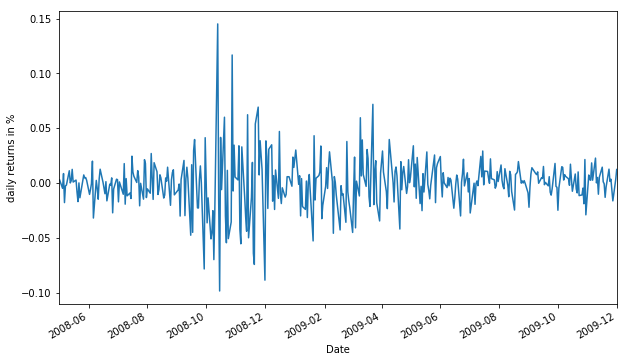

In [13]:
returns.plot(figsize=(10,6))
plt.ylabel('daily returns in %')

In [21]:
from pymc3 import Model, Exponential, StudentT, Deterministic, NUTS, sample
from pymc3.math import exp
from pymc3.distributions.timeseries import GaussianRandomWalk



In [19]:
with Model() as sp500_model:
    nu = Exponential('nu', 1./10, testval=5.)
    sigma = Exponential('sigma', 1./.02, testval=.1)
    s = GaussianRandomWalk('s', sigma**(-2), shape=len(returns))
    volatility_process = Deterministic('volatility_process',exp(-2*s))
    r = StudentT('r', nu, lam=1/volatility_process, observed=returns)


In [22]:
from pymc3 import variational

import scipy
with sp500_model:
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 883.54: 100%|██████████| 200000/200000 [00:34<00:00, 5831.60it/s]
Finished [100%]: Average ELBO = 883.43
100%|█████████▉| 1999/2000 [01:28<00:00, 28.20it/s]/Users/libland/miniconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:237: UserWarning: Step size tuning was enabled throughout the whole trace. You might want to specify the number of tuning steps.
  warnings.warn('Step size tuning was enabled throughout the whole '
/Users/libland/miniconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 2000/2000 [01:28<00:00, 22.60it/s]


In [24]:
from pymc3 import traceplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110645cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fd7ec90>]], dtype=object)

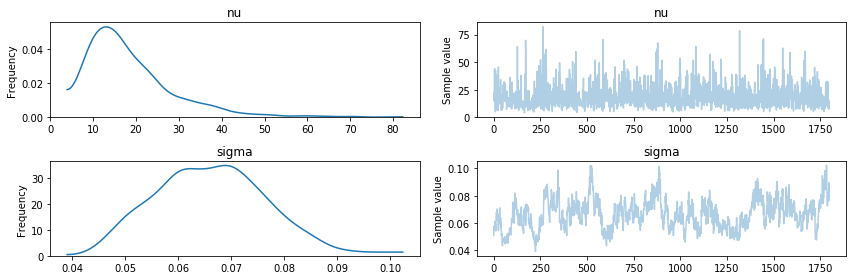

In [25]:
traceplot(trace[200:],[nu,sigma])

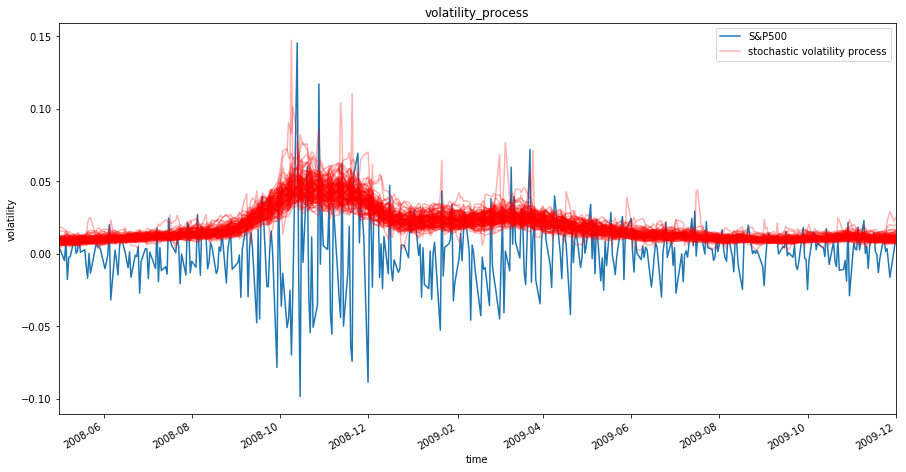

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
returns.plot(ax=ax)
ax.plot(returns.index, 1/np.exp(trace['s',::20].T),'r',alpha=0.3)
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['S&P500', 'stochastic volatility process'])